## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('hsp90_05_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1117,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1118,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1119,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df.pIC50
Y

,pIC50
0,4.767004
1,4.271646
2,4.522879
3,5.387216
4,6.698970
...,...
1116,6.437707
1117,7.161151
1118,6.728158
1119,4.339135


In [5]:
X.shape

(1121, 881)

In [6]:
Y.shape

(1121,)

## Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(1121, 202)

## Split Data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((896, 202), (896,), (225, 202), (225,))

## Membangun Model Regresi dengan Random Forest

In [11]:
import numpy as np

np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6805977893038586

In [12]:
Y_pred = model.predict(X_test)

In [13]:
Y_pred = model.predict(X)
Y_pred

array([4.97269538, 4.61868238, 4.69926948, ..., 6.67338773, 4.29502835,
       4.29502835])

In [14]:
from sklearn.metrics import mean_squared_error, r2_score # Import necessary functions

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.23
Coefficient of determination (R^2): 0.84


## Visualisasi hasil

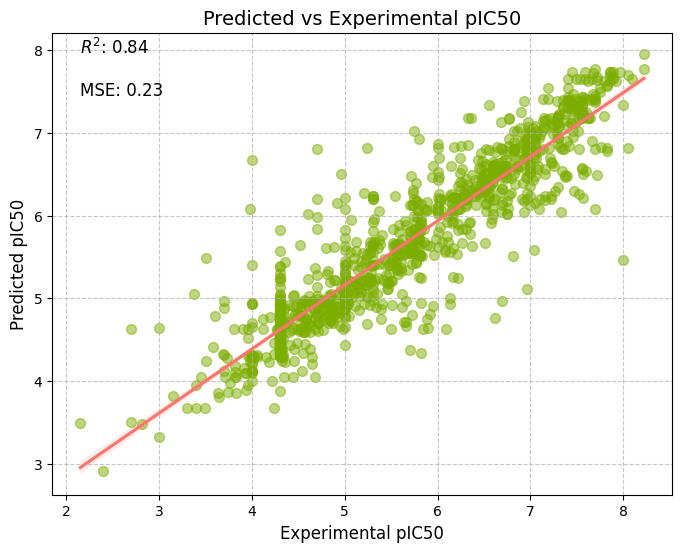

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x=Y, y=Y_pred, color="#7CAE00", scatter_kws={'alpha':0.5, 's': 50}, line_kws={'color': '#F8766D'})

plt.ylabel('Predicted pIC50', fontsize=12)
plt.xlabel('Experimental pIC50', fontsize=12)
plt.title('Predicted vs Experimental pIC50', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add annotations for R^2 and MSE
plt.text(min(Y), max(Y_pred), f'$R^2$: {r2_score(Y, Y_pred):.2f}', fontsize=12)
plt.text(min(Y), max(Y_pred) - 0.5, f'MSE: {mean_squared_error(Y, Y_pred):.2f}', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)


plt.savefig('Scatter_plot.pdf', bbox_inches='tight')
plt.show()